In [1]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [2]:
import pandas as pd

df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [5]:
# Fill missing values with placeholders
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Not available', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Drop rows with minor missing values
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

# Confirm it's clean now
df.isnull().sum()


/tmp/ipython-input-1109595008.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-1109595008.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


# **Content Type Distribution (Movies vs TV Shows)**


/tmp/ipython-input-3889962186.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


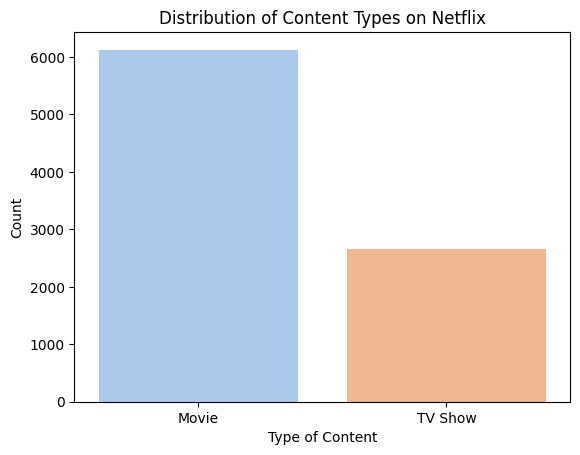

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of Movies vs TV Shows
sns.countplot(data=df, x='type', palette='pastel')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.show()


# **Top Countries Producing Netflix Content**


/tmp/ipython-input-3290782179.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


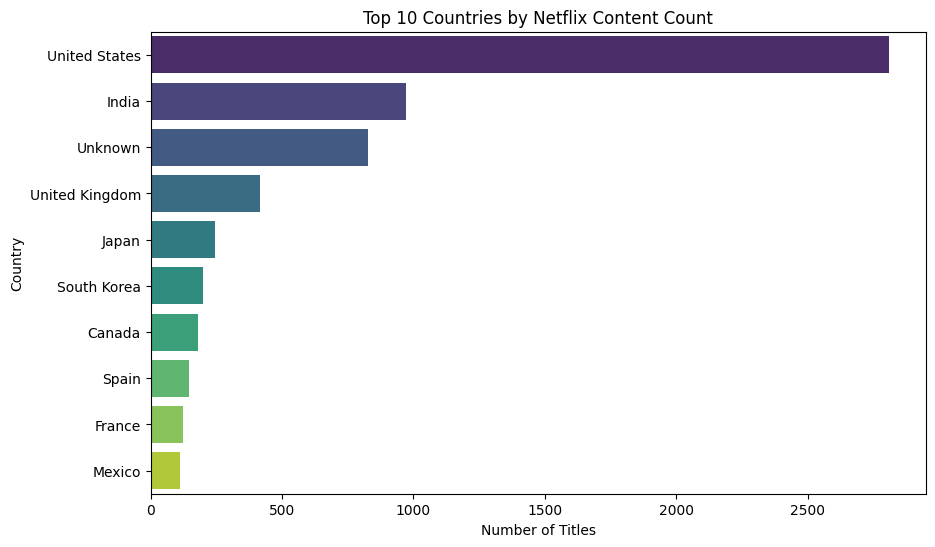

In [7]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Netflix Content Count')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


# **Year-wise Content Release Trend**

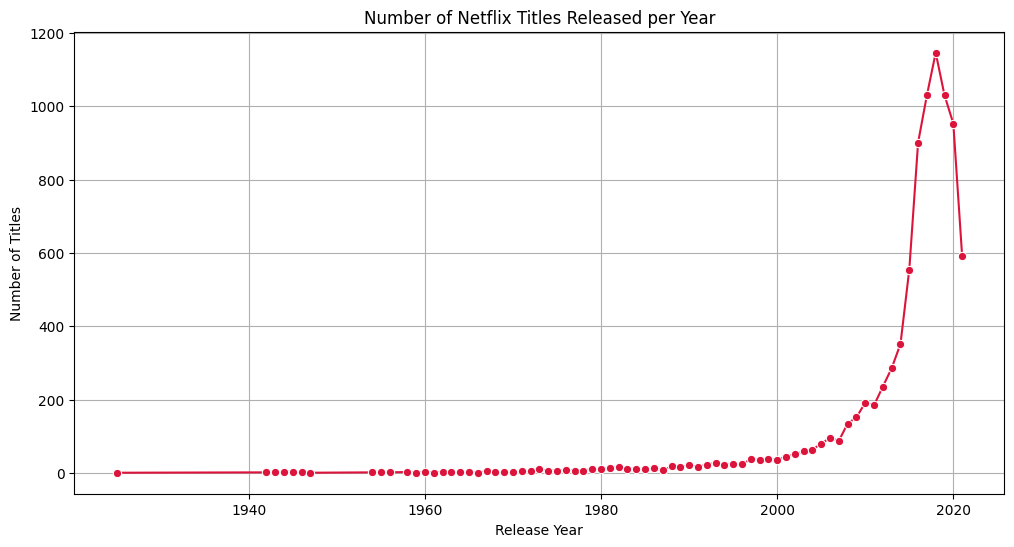

In [8]:
# Count of releases per year
yearly_trend = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o', color='crimson')
plt.title('Number of Netflix Titles Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


# **Analyzing Content Duration**

# Step 1: Split Movie & TV Duration

In [9]:
# Create separate columns for 'duration_int' and 'duration_type'
df[['duration_int', 'duration_type']] = df['duration'].str.extract('(\d+)\s*(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')


# Step 2: Compare Duration Types

/tmp/ipython-input-2526828864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='duration_int', palette='Set2')


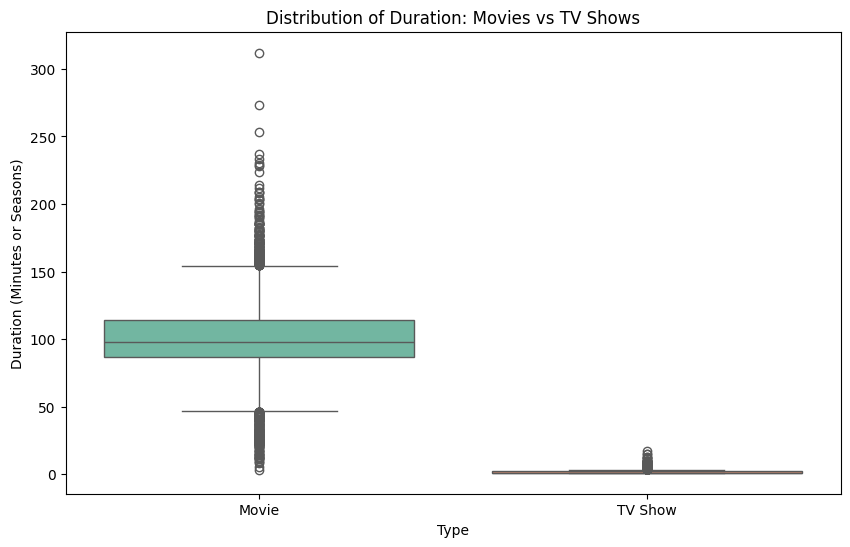

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='type', y='duration_int', palette='Set2')
plt.title('Distribution of Duration: Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Duration (Minutes or Seasons)')
plt.show()


# **Exploring Popular Genres**

/tmp/ipython-input-1057377188.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df, palette='mako')


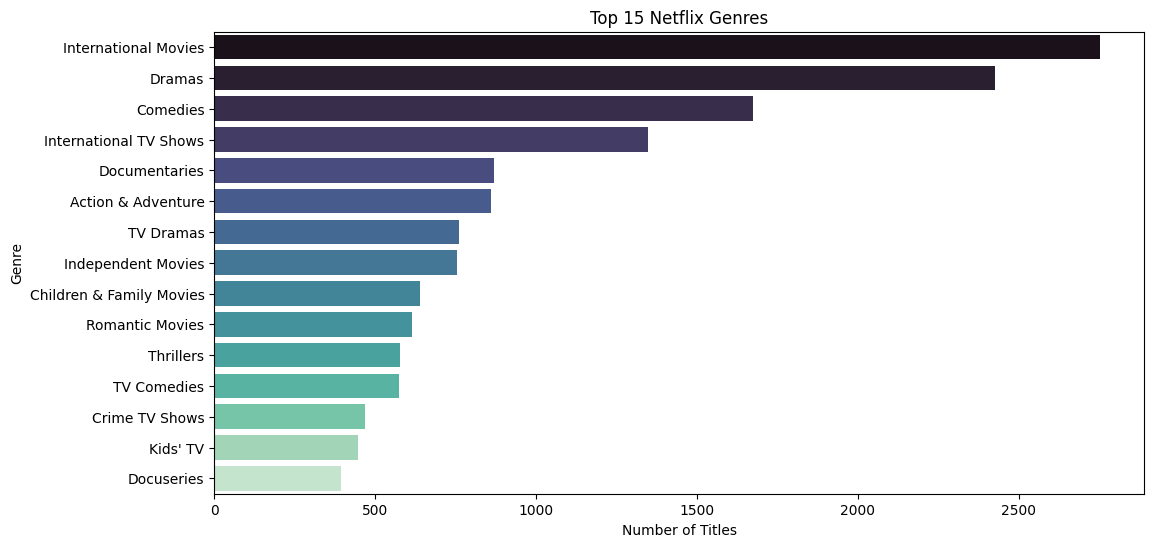

In [11]:
from collections import Counter

# Create a list of all genres
all_genres = df['listed_in'].str.split(', ')
flat_genres = [genre for sublist in all_genres for genre in sublist]

# Count the most common genres
genre_counts = Counter(flat_genres).most_common(15)

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Count', y='Genre', data=genre_df, palette='mako')
plt.title('Top 15 Netflix Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()
